In [1]:
%matplotlib inline

import random
import numpy as np
import matplotlib.pyplot as plt
from tqdm.notebook import tqdm

import torch
import torch.nn as nn
from torchvision import datasets, transforms

In [2]:
class Logistic_Regression(nn.Module):
    def __init__(self):
        super().__init__()
        self.layers = nn.Sequential(
            nn.Flatten(1), # faltten an image to a vector
            nn.Linear(28*28, 500),
            nn.ReLU(),
            nn.Linear(500, 10)
        )

    def forward(self, x):
        return self.layers(x)

In [3]:
# load data and create minibatch
mnist_train = datasets.MNIST(root="./datasets", train=True, transform=transforms.ToTensor(), download=True)
mnist_test = datasets.MNIST(root="./datasets", train=False, transform=transforms.ToTensor(), download=True)
train_loader = torch.utils.data.DataLoader(mnist_train, batch_size=100, shuffle=True)
test_loader = torch.utils.data.DataLoader(mnist_test, batch_size=100, shuffle=False)

model = Logistic_Regression()
criterion = nn.CrossEntropyLoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.1)

for images, labels in tqdm(train_loader):

    optimizer.zero_grad()
    
    y = model(images)
    loss = criterion(y, labels)

    loss.backward()
    optimizer.step()

# Test is the same as before
correct = 0
with torch.no_grad():
    for images, labels in tqdm(test_loader):
        y = model(images)
        predictions = torch.argmax(y, dim=1)
        correct += torch.sum((predictions == labels).int())
    
print(f'Test accuracy: {correct/len(mnist_test)}')


Test accuracy: 0.925000011920929


In [4]:
for name, param in model.named_parameters():
    if param.requires_grad:
        print(name, param.data.shape)

layers.1.weight torch.Size([500, 784])
layers.1.bias torch.Size([500])
layers.3.weight torch.Size([10, 500])
layers.3.bias torch.Size([10])


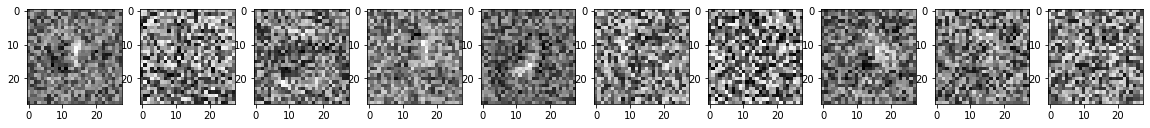

In [8]:
# we can also visualize the parameters
for name, param in model.named_parameters():
    if param.requires_grad and '1.weight' in name:
        fig, ax = plt.subplots(1, 10, figsize=(20, 2))

        # randomly select 10 from the 500 nodes to visualize
        for num in range(10):
            plotdata = random.choice(param.data)
            ax[num].imshow(plotdata.detach().view(28, 28), cmap='gray')